##### Name :    P A E Sai Raj
##### Rollno :  2020101049

In [350]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image,display
print(cv.__version__)
length_grid = 2

4.9.0


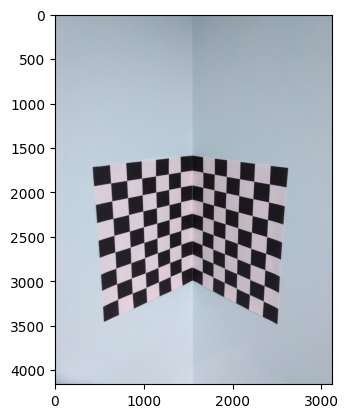

In [351]:

image_path = 'calib-object.jpg'
img = cv.imread(image_path)
plt.imshow(img)
plt.show()

For the given image calib-object.jpg, identify the chessboard internal corners. You may use external
libraries to detect the chessboard corners. Note, each square of the chess board is 2cm × 2cm.


[1539 2852]
[2057 2411]
[1660 1610]
[2360 2881]
[1416 2278]
[2402 2120]
[2237 1887]
[1159 2857]
[1903 3021]
[2066 2044]
[2369 2697]
[2059 2231]
[1790 1984]
[2616 1731]
[2082 1665]
[2216 2270]
[1663 2122]
[1277 1624]
[2392 2314]
[1025 3081]
[1777 2804]
[2074 1856]
[2597 1948]
[2051 2585]
[2534 2760]
[1779 2963]
[2379 2509]
[2243 1685]
[1541 2087]
[1664 1955]
[2578 2162]
[2047 2755]
[1543 1929]
[1653 2598]
[2562 2366]
[1660 2444]
[1929 1832]
[2202 2638]
[2412 1917]
[2422 1708]
[1791 1807]
[1909 2531]
[1777 2650]
[2352 3057]
[1780 2320]
[1395 2602]
[1666 1785]
[2196 2818]
[2185 3156]
[1930 1644]
[2045 2926]
[1915 2366]
[2192 2992]
[1291 2638]
[2343 3234]
[1296 2958]
[2041 3090]
[1921 2012]
[1422 2899]
[1905 2699]
[ 847 2628]
[1419 2435]
[1656 2902]
[ 468 2248]
[1148 2358]
[1340 2136]
[1778 2485]
[ 801 1677]
[2208 2456]
[1538 2248]
[1410 1782]
[1305 3112]
[1795 1627]
[1410 1606]
[1918 2193]
[1415 1952]
[1541 2557]
[1434 3050]
[2547 2570]
[2522 2954]
[ 701 3038]
[1135 1641]
[2482 3481]
[128

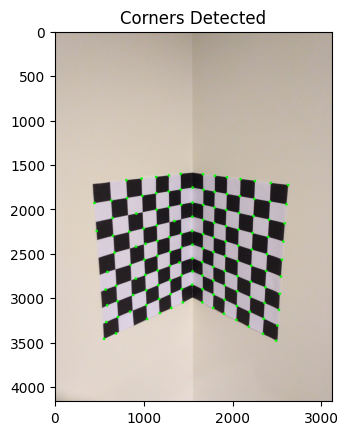

In [352]:

#converting normal image to gray_scale image

grayscale_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

numofcorners = 140

#Function returns strongest numcorners

internal_corners = cv.goodFeaturesToTrack(grayscale_img,numofcorners,0.01,100)

corners = internal_corners.astype(np.int32)


new_img = img.copy()
green_colour = (0,255,0)


#Now iterate through every corner and draw a circle around each corner
for c in corners :
    point = c.ravel()
    print(point)
    cv.circle(new_img,tuple(point),15,green_colour,-1)

new_img = cv.cvtColor(new_img, cv.COLOR_BGR2RGB)

# Display the image with marked corners using matplotlib
plt.imshow(new_img)
plt.title('Corners Detected')
plt.show()














In [353]:
#Performing Camera Calibration
#Inputs are Coordinates in world frame and correspnding coordinates in image frame
#Writing helper function

def Generate(A,W,C):
    A.append([W[0],W[1],W[2],1,0,0,0,0,-C[0]*W[0],-C[0]*W[1],-C[0]*W[2],-C[0]])
    A.append([0,0,0,0,W[0],W[1],W[2],1,-C[1]*W[0],-C[1]*W[1],-C[1]*W[2],-C[1]])
    return A



def PerformCalibration(W_c,C_c,n):

    #W_c represents the coordinates in world frame its dimensions are nX3
    #C_c represents the coordinates in the camera frame and its dimensions is nX2
    #n is the number of points
    #Make sure that n is greater than 6
    A = []
    for i in range(n):
        A = Generate(A,W_c[i],C_c[i])
    
    A = np.asarray(A)
    
   
    U,S,VT = np.linalg.svd(A)

    #The projection matrix is last column of V so it will be last row of VT we need to scale it
    
    P = VT[-1]

    P =  P.reshape(3,4)

    P = P/P[2][3]

    return P



def getIntrinsic_Extrinsic(P):
    
    #We need to decompose the Matrix P so that we can get intrinsic matrix,translation vector and Rotation Matrix
    upper_t = P[0:3,0:3]

    last_row = P[0:3,3]

    Q,R = np.linalg.qr(upper_t)

    #Q - orthonormal matrix
    #R - upper triangular
    inv_matrix = np.linalg.inv(upper_t)

    rotation_matrix = - inv_matrix@last_row

    return rotation_matrix


In [354]:

World_coordinates = [[0,0,0],[7,0,0],[7,9,0],[0,9,0],[0,9,7],[0,0,7],[1,1,0],[0,1,1],
                     [0,6,4],[4,6,0],[0,1,5],[0,3,5],[0,5,5],[5,1,0],[5,3,0],[5,5,0]]

World_coordinates = np.array(World_coordinates)

World_coordinates = length_grid*World_coordinates

Camera_Coordinates = [
[1544, 2987],[2488, 3478],[2590, 1722],[1537, 1589],[433, 1706]
,[569, 3420],
 [1661, 2904],[1420, 2904],[991, 2221],[2059, 2238],
[870, 3145],[854, 2804],[838, 2438],[2188, 3153],[2200, 2820],[2207, 2463]]

Camera_Coordinates = np.array(Camera_Coordinates)

P = PerformCalibration(World_coordinates,Camera_Coordinates,16)
print("Projection Matrix:")
print(P)
Rotation_matrix  = getIntrinsic_Extrinsic(P)
print("Rotation_Matrix:")
print(Rotation_matrix)


Projection Matrix:
[[ 3.16367509e+01 -8.56089623e+00 -7.75298883e+01  1.54505654e+03]
 [-1.56109003e+01 -8.65551817e+01 -1.45725359e+01  2.99811131e+03]
 [-1.43679422e-02 -5.19998866e-03 -1.33122148e-02  1.00000000e+00]]
Rotation_Matrix:
[32.6628814  23.58645696 30.65247256]


Q) Use the real-world measurements along with the estimated camera parameters to compute the image
of a wireframe of the object (Hint: the wireframe is the outer corners of the actual chessboard pattern and has
6 points). Note that you should compute the location of image points as xi = P Xi
, where P is the projection
matrix computed above. Overlay (draw) the wireframe over the actual image of the object using straight lines
between the computed points xi
. What do you observe about the overlay?

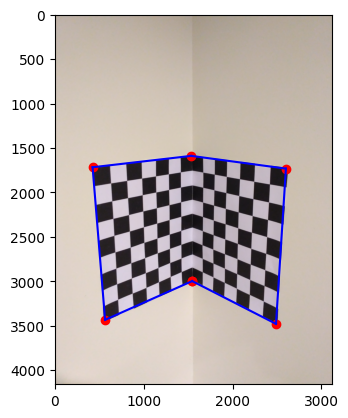

In [355]:
#Now , we will represent the wireframe that is outer corners of the chess board

#Now let us write a function which takes points from world frame and give corresponding points in camera frame

def World2Camera(P,Points):
    Camera_points = []
    #Points = np.append(Points,np.ones((Points.shape[0])))
    Points = np.hstack((Points,np.ones((Points.shape[0],1))))

    #print(Points)
    for w in Points:
        #print(P)
        #print(w)
        image_points = P@w
        image_points = image_points/image_points[-1]
        Camera_points.append([image_points[0],image_points[1]])
    
    return Camera_points


W_c_q1 = [[0,0,0],[7,0,0],[7,9,0],[0,9,0],[0,9,7],[0,0,7],[0,0,0]]

W_c_q1 = np.array(W_c_q1)

W_c_q1 = length_grid*W_c_q1

Camera_c = World2Camera(P,W_c_q1)

Camera_c = np.array(Camera_c)
x_coords = Camera_c[:,0]
y_coords = Camera_c[:,1]
# Plot the points on the image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.scatter(x_coords, y_coords, color='red', marker='o')

# Draw lines between adjacent coordinates
for i in range(len(Camera_c) - 1):
    plt.plot([x_coords[i], x_coords[i+1]], [y_coords[i], y_coords[i+1]], color='blue')



Given the rotation matrix, compute the three rotation angles. Explain the values that you obtain in
terms of pan, tilt, and roll?

In [356]:


def rotation_matrix_to_euler_angles(rotation_matrix):
    
    r11, r12, r13 = rotation_matrix[0, 0], rotation_matrix[0, 1], rotation_matrix[0, 2]
    r21, r22, r23 = rotation_matrix[1, 0], rotation_matrix[1, 1], rotation_matrix[1, 2]
    r31, r32, r33 = rotation_matrix[2, 0], rotation_matrix[2, 1], rotation_matrix[2, 2]

    pitch = np.arcsin(-r23)

    roll = np.arctan2(r22, r33)

    yaw = np.arctan2(r21, r11)

   
    pitch_deg = np.degrees(pitch)
    roll_deg = np.degrees(roll)
    yaw_deg = np.degrees(yaw)

    return roll_deg, pitch_deg, yaw_deg


roll, pitch, yaw = rotation_matrix_to_euler_angles(Rotation_matrix)


print("Roll (phi): {:.2f} degrees".format(roll))
print("Pitch (theta): {:.2f} degrees".format(pitch))
print("Yaw (psi): {:.2f} degrees".format(yaw))



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

####    Q2
##### 1)
Now repeat the camera calibration process for calib-object.jpg using OpenCV calibration functions, continue to assume that there is no skew or distortion (Hint: see calibrateCamera() FLAGS). How does
your result compare with Q1 above? Repeat the overlay of the wireframe using the new parameters. Describe
your observations.

In [ ]:



Ca = [[1540, 2995],
	 [1774, 3120],
	 [2184, 3145],
	 [2496, 3478],
	[2582, 2163],
	 [2231, 2097],
	[1930, 1830],
	 [1540, 1597],
	[1537, 2255],
	 [1911, 2363],
]
Wo =[
    [0, 0, 0], [2, 0, 0], [5, 1, 0], [7, 0, 0],
    [7, 7, 0],  [5, 7, 0],  [3, 8, 0], [0, 9, 0], [0, 5, 0],[3,5,0]
]


Wo = np.array(Wo, dtype=np.float32)
Ca = np.array(Ca, dtype=np.float32)


Wo = [Wo]
Ca = [Ca]


image_size = grayscale_img.shape[::-1]

# Ensure Wo and Ca are lists or arrays
ret, Intrinsic_inbuilt_matrix,dist, rotation, translation_v = cv.calibrateCamera(Wo, Ca, image_size, None, None)



Ca1 = [[1540, 2955], [2057, 2411], [1660, 1610], [2360, 2881], [1416, 2278], [1159, 2857], [1277, 1624], [1025, 3081]]
Wo1 = [[0, 0, 0], [8, 10, 0], [2, 18, 0], [12, 6, 0], [0, 10, 2], [0, 4, 6], [0, 18, 4], [0, 2, 8]]


Wo1 = np.array(Wo1, dtype=np.float32)
Ca1 = np.array(Ca1, dtype=np.float32)


Wo1 = [Wo1]
Ca1= [Ca1]

print(Wo1)
print(Ca1)

ret, Intrinsic_inbuilt_matrix,dist, rotation, translation_v = cv.calibrateCamera(Wo1, Ca1, image_size, Intrinsic_inbuilt_matrix, None,flags = cv.CALIB_USE_INTRINSIC_GUESS)



rotation_m,_ = cv.Rodrigues(rotation[0])
Extrinsic_inbuilt_matrix = np.hstack((rotation_m, translation_v[0]))

Projection_matrix = np.dot(Intrinsic_inbuilt_matrix,Extrinsic_inbuilt_matrix)

print("Projection Matrix:")
print(Projection_matrix)


[array([[ 0.,  0.,  0.],
       [ 8., 10.,  0.],
       [ 2., 18.,  0.],
       [12.,  6.,  0.],
       [ 0., 10.,  2.],
       [ 0.,  4.,  6.],
       [ 0., 18.,  4.],
       [ 0.,  2.,  8.]], dtype=float32)]
[array([[1540., 2955.],
       [2057., 2411.],
       [1660., 1610.],
       [2360., 2881.],
       [1416., 2278.],
       [1159., 2857.],
       [1277., 1624.],
       [1025., 3081.]], dtype=float32)]
Projection Matrix:
[[ 1.92123205e+03 -5.28802629e+02 -3.95065041e+03  7.78136368e+04]
 [-5.21439017e+02 -4.64426715e+03 -4.75205881e+02  1.51033095e+05]
 [-6.71816035e-01 -3.37876186e-01 -6.59168338e-01  5.02136675e+01]]


[[ 0  0  0]
 [14  0  0]
 [14 18  0]
 [ 0 18  0]
 [ 0 18 14]
 [ 0  0 14]
 [ 2  2  0]
 [ 0  2  2]
 [ 0 12  8]
 [ 8 12  0]
 [ 0  2 10]
 [ 0  6 10]
 [ 0 10 10]
 [10  2  0]
 [10  6  0]
 [10 10  0]]


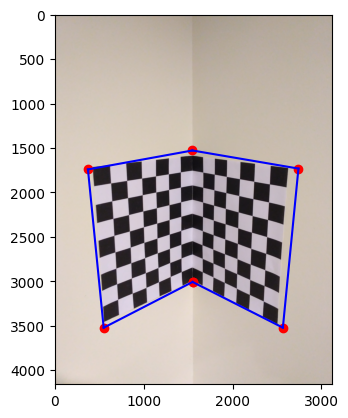

In [ ]:

W_c = [[0,0,0],[7,0,0],[7,9,0],[0,9,0],[0,9,7],[0,0,7],[0,0,0]]

W_c = np.array(W_c)

W_c = length_grid*W_c

Camera_c = World2Camera(Projection_matrix,W_c)

Camera_c = np.array(Camera_c)
x_coords = Camera_c[:,0]
y_coords = Camera_c[:,1]
# Plot the points on the image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.scatter(x_coords, y_coords, color='red', marker='o')

# Draw lines between adjacent coordinates
for i in range(len(Camera_c) - 1):
    plt.plot([x_coords[i], x_coords[i+1]], [y_coords[i], y_coords[i+1]], color='blue')

print(World_coordinates)

t Q2.1, for the second image assign1.jpg. Does the wireframe overlay show significant distortions? Comment. What can we say about the computed projection matrix when trying to do calibration based
on world coordinate points that are co-planar? (Hint: we looked at co-planar points in two-view geometry).

[1257  826]
[1063  794]
[968 793]
[1159  795]
[1254  796]
[ 953 1008]
[1268  894]
[ 729 1007]
[959 893]
[861 857]
[1065  826]
[1286  972]
[1291 1012]
[1062  859]
[1063  892]
[964 825]
[1363  860]
[1167  860]
[1160  827]
[959 966]
[773 821]
[1350  798]
[966 858]
[1173  932]
[1380  932]
[957 927]
[1066 1009]
[1166  895]
[855 927]
[872 793]
[1177  968]
[1402 1014]
[1056  703]
[870 824]
[1279  931]
[1392  972]
[1067  970]
[758 888]
[1178 1009]
[1063  931]
[1356  828]
[1267  859]
[849 968]
[741 964]
[1373  896]
[778 791]
[ 841 1007]
[747 928]
[1737  204]
[765 857]


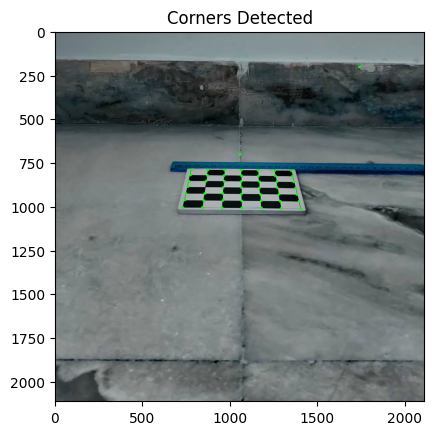

In [ ]:
#converting normal image to gray_scale image

img = cv.imread('assign1.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)   
grayscale_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

len_grid = 2
image_size = grayscale_img.shape[::-1]

numofcorners = 50

#Function returns strongest numcorners

internal_corners = cv.goodFeaturesToTrack(grayscale_img,numofcorners,0.01,30)

corners = internal_corners.astype(np.int32)


new_img = img.copy()
green_colour = (0,255,0)


#Now iterate through every corner and draw a circle around each corner
for c in corners :
    point = c.ravel()
    print(point)
    cv.circle(new_img,tuple(point),8,green_colour,-1)

new_img = cv.cvtColor(new_img, cv.COLOR_BGR2RGB)

# Display the image with marked corners using matplotlib
plt.imshow(new_img)
plt.title('Corners Detected')
plt.show()

In [ ]:
image_Coordinates=[[1268, 894],[1257, 826], [1063, 794], [968, 793], [1159, 795], [1254, 796],[953, 1008], [729, 1007],[959,893],[861,  857],[1065,826]]
Object_Coordinates=[[5,3,0],[5,5,0], [3,6,0], [2,6,0], [4,6,0], [5,6,0],[2,0,0], [0,0,0],  [2,3,0], [1,4,0],[3,5,0]]


Object_Coordinates = np.array(Object_Coordinates, dtype=np.float32)
Object_Coordinates = len_grid*Object_Coordinates
image_Coordinates = np.array(image_Coordinates, dtype=np.float32)

print(Object_Coordinates)
print(image_Coordinates)

print(image_size)

ret, Intrinsic_inbuilt_matrix,dist, rotation, translation_v = cv.calibrateCamera([Object_Coordinates],[image_Coordinates], image_size, None, None)

rotation_m,_ = cv.Rodrigues(rotation[0])
Extrinsic_inbuilt_matrix = np.hstack((rotation_m, translation_v[0]))

Projection_matrix = np.dot(Intrinsic_inbuilt_matrix,Extrinsic_inbuilt_matrix)
#Projection_matrix = Projection_matrix/Projection_matrix[-1,-1]
print(Projection_matrix)

[[10.  6.  0.]
 [10. 10.  0.]
 [ 6. 12.  0.]
 [ 4. 12.  0.]
 [ 8. 12.  0.]
 [10. 12.  0.]
 [ 4.  0.  0.]
 [ 0.  0.  0.]
 [ 4.  6.  0.]
 [ 2.  8.  0.]
 [ 6. 10.  0.]]
[[1268.  894.]
 [1257.  826.]
 [1063.  794.]
 [ 968.  793.]
 [1159.  795.]
 [1254.  796.]
 [ 953. 1008.]
 [ 729. 1007.]
 [ 959.  893.]
 [ 861.  857.]
 [1065.  826.]]
(2112, 2112)
[[ 5.50895079e+02  1.42226890e+02 -1.02290743e+03  6.44569882e+03]
 [ 2.55241003e+01 -6.03333479e+01 -9.40640118e+02  9.10666336e+03]
 [ 2.61278183e-02  1.33963606e-01 -9.90641756e-01  9.00250733e+00]]


[[ 5.50895079e+02  1.42226890e+02 -1.02290743e+03  6.44569882e+03]
 [ 2.55241003e+01 -6.03333479e+01 -9.40640118e+02  9.10666336e+03]
 [ 2.61278183e-02  1.33963606e-01 -9.90641756e-01  9.00250733e+00]]
[[ 0  0  0]
 [14  0  0]
 [14 18  0]
 [ 0 18  0]
 [ 0 18 14]
 [ 0  0 14]
 [ 2  2  0]
 [ 0  2  2]
 [ 0 12  8]
 [ 8 12  0]
 [ 0  2 10]
 [ 0  6 10]
 [ 0 10 10]
 [10  2  0]
 [10  6  0]
 [10 10  0]]


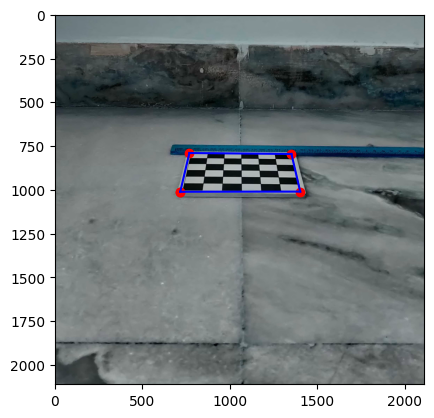

In [ ]:
W_c=[[0,0,0],[6,0,0],[6,6,0],[0,6,0],[0,0,0]]


W_c = np.array(W_c)

W_c = len_grid*W_c
print(Projection_matrix)
Camera_c = World2Camera(Projection_matrix,W_c)

Camera_c = np.array(Camera_c)
x_coords = Camera_c[:,0]
y_coords = Camera_c[:,1]
# Plot the points on the image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.scatter(x_coords, y_coords, color='red', marker='o')

# Draw lines between adjacent coordinates
for i in range(len(Camera_c) - 1):
    plt.plot([x_coords[i], x_coords[i+1]], [y_coords[i], y_coords[i+1]], color='blue')

print(World_coordinates)


What is the image of the world origin, given the calibration matrix? Does this result agree with your
observations?


In [ ]:
World_origin_object = [0,0,0]
World_origin_object.append(1)

origin = Projection_matrix@World_origin_object

origin = origin/origin[-1]

print(origin)



[7.15989289e+02 1.01156967e+03 1.00000000e+00]


Imagine that the chessboard in assign1.jpg was moved by 10 cm to the right (along the ruler).
Overlay a wireframe (4 points) of the virtual chessboard on the image at the appropriate location. Does the
wireframe look consistent with what you expect?


In [ ]:
def plotter(Projection_matrix,W_c):
    W_c = np.array(W_c)
    Camera_c = World2Camera(Projection_matrix,W_c)
    Camera_c = np.array(Camera_c)
    x_coords = Camera_c[:,0]
    y_coords = Camera_c[:,1]
    # Plot the points on the image
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    #plt.scatter(x_coords, y_coords, color='red', marker='o')

    # Draw lines between adjacent coordinates
    for i in range(len(Camera_c) - 1):
        plt.plot([x_coords[i], x_coords[i+1]], [y_coords[i], y_coords[i+1]], color='blue')


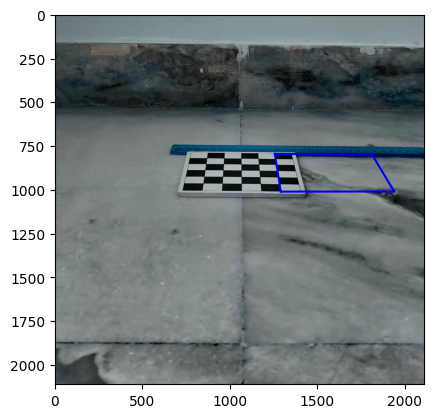

In [ ]:
W_c=[[5,0,0],[11,0,0],[11,6,0],[5,6,0],[5,0,0]]
W_c = np.array(W_c)

W_c = len_grid*W_c

plotter(Projection_matrix,W_c)


Now, think of how you would move the actual pixels or pattern of the chessboard? Overlay the
chessboard pattern within the predicted wireframe. Is the overlay consistent with what you expect?

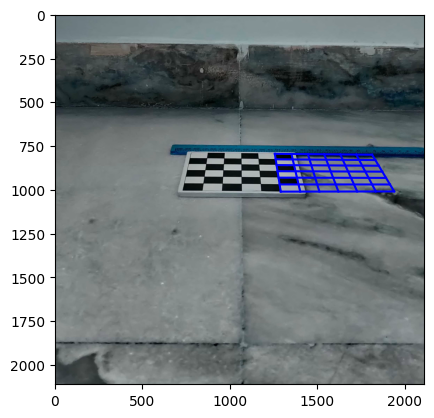

In [ ]:
W_c_horizontal = [[[6,0,0],[6,6,0]],[[7,0,0],[7,6,0]],[[8,0,0],[8,6,0]],[[9,0,0],[9,6,0]],[[10,0,0],[10,6,0]]]
W_c_vertical = [[[5,1,0],[11,1,0]],[[5,2,0],[11,2,0]],[[5,3,0],[11,3,0]],[[5,4,0],[11,4,0]],[[5,5,0],[11,5,0]]]


plotter(Projection_matrix,W_c)

for i in range(5):
    plotter(Projection_matrix,len_grid*np.array(W_c_horizontal[i]))
    plotter(Projection_matrix,len_grid*np.array(W_c_vertical[i]))